# TME 9 – Interpreting Simple ML Models (Iris / Small Tabular Dataset)

## Objectives

On a small supervised learning problem (e.g. Iris classification), you will:

- Train one or two simple models (e.g. Logistic Regression, Random Forest).
- Use `sklearn.inspection` to:
  - estimate **feature importance** (permutation importance),
  - visualize **partial dependence** and **ICE**.


In [1]:
# 0. Imports and setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import permutation_importance, PartialDependenceDisplay

plt.style.use("ggplot")

First, we will load the IRIS dataset. The Iris dataset is a classic, small supervised classification dataset introduced by Ronald Fisher in 1936. It contains 150 flower samples from three species of iris (Setosa, Versicolor, Virginica), with 50 samples per class.

Each sample is described by four numerical features:

- Sepal length (cm)

- Sepal width (cm)

- Petal length (cm)

- Petal width (cm)

The task is to predict the species from these measurements.
The dataset is well-balanced, low-dimensional, and linearly separable for some classes, which makes it ideal for illustrating basic machine learning models, visualization, and interpretability techniques.

In [2]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### TODO

- Split the data into train and test sets (e.g. 70% / 30%).
- Use a fixed `random_state` for reproducibility.


In [ ]:
random_state = 42

X_train, X_test, y_train, y_test = ... # TODO

## 2. Train simple models

We will train:
- a **Logistic Regression** (linear model),
- a **Random Forest** (non-linear, tree-based).

Both will be wrapped in a small pipeline with standardization.


### TODO– Logistic Regression

- Build a `Pipeline`: `StandardScaler` + `LogisticRegression`. `StandardScaler()` is used to normalize numerical features so that they have mean = 0 and standard deviation = 1. `Pipeline(["scaler",s,"model",m])` allows you to chain multiple operations (here scale the data using `s` then feed it to the model `m`). You can have a look at the  [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more detailed explaination and examples.
- Fit it on the training set.
- Compute and print accuracy on train and test.


In [ ]:
pipe_log = Pipeline([
    ... #TODO
])

# Fit the model and predict


# Print accuracy


Logistic Regression – train accuracy: 0.9809523809523809
Logistic Regression – test accuracy : 0.9111111111111111


### TODO – Random Forest

- Create a `RandomForestClassifier` (e.g. 100–200 trees).
- Wrap it in a pipeline with `StandardScaler` (even if trees do not need scaling, we keep the interface identical).
- Compare its train/test accuracy with Logistic Regression.


In [ ]:
# Define pipeline for Random Forest

# Fit and predict

# Print accuracy


Random Forest – train accuracy: 1.0
Random Forest – test accuracy : 0.8888888888888888


### Question  
Which model seems more flexible (risk of overfitting)? Use the train vs test accuracy gap to justify your answer in one or two sentences.


## 3. Global explanation: permutation importance

We now examine which features are most important for each model using **permutation importance**.


### TODO – Permutation importance for Logistic Regression

- Use `permutation_importance` on the **test set** with `scoring="accuracy"`. The function `permutation_importance` is a model-agnostic method from sklearn.inspection used to estimate feature importance. It measures how much a model's performance decreases when the values of a single feature are randomly shuffled in the test set. Basically, 
if shuffling a feature breaks the model’s predictions, then the feature was important. If performance stays the same, the feature was not used by the model.
It returns the mean decrease in performance across multiple shuffles, the standard deviation, one entry per feature. It works with every model, but might be computationally expensive since it requires re-evaluating the model many times.

- Build a small `DataFrame` with:
  - feature name,
  - mean importance,
  - standard deviation.
- Plot a horizontal bar chart (from least to most important feature).


In [ ]:
result_log = permutation_importance(
   # TODO
)

# Compute a dataframe to sum up the results


,feature,mean_importance,std_importance
0,sepal length (cm),0.006667,0.018725
1,sepal width (cm),0.043333,0.024820
2,petal length (cm),0.170000,0.050320
3,petal width (cm),0.176667,0.037499


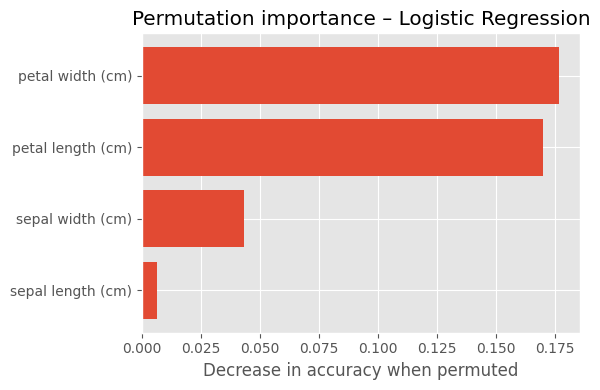

In [ ]:
# Plot the results as a bar plot
# Warning: the variables name may differ depending on your implementation

plt.figure(figsize=(6, 4))
plt.barh(importances_log["feature"], importances_log["mean_importance"])
plt.xlabel("Decrease in accuracy when permuted")
plt.title("Permutation importance – Logistic Regression")
plt.tight_layout()
plt.show()

### TODO – Permutation importance for Random Forest

- Repeat the same computation and plot for the random forest pipeline.
- Compare the ranking of features between the two models.


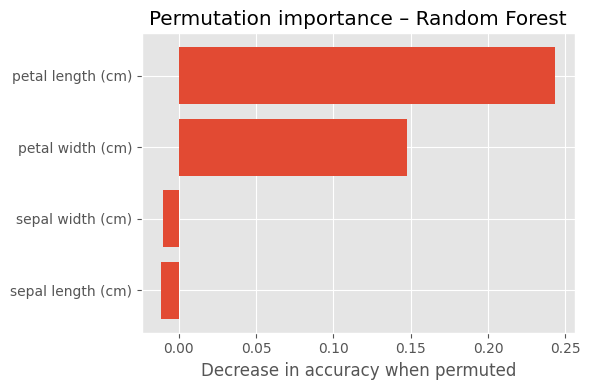

In [ ]:
# Define the permutation importance pipeline for Random Forest

# Compute the dataframe to sum up the results*

# Plot the results as a bar plot



### Question  
- Which features are most important for each model?  
- Do the most important features make sense with what you know about Iris (e.g. which measurements separate species)?


## 4. Local behavior: Partial Dependence and ICE

We now look at how the predicted class probabilities change when a *single feature* varies.
For simplicity, we will focus on **one target class** and **one or two features**.


### TODO – Partial dependencies for one feature

The Iris features are:

- sepal length (cm)  
- sepal width (cm)  
- petal length (cm)  
- petal width (cm)  

Pick **one feature**, e.g. `"petal length (cm)"`, and:

- Use `PartialDependenceDisplay.from_estimator` on the logistic regression pipeline. This function from sklearn.inspection plots Partial Dependence Plots (PDP) and Individual Conditional Expectation (ICE) curves for a fitted model.
    - PDP shows the average effect of a feature on the model’s predicted output. PDP corresponds to the model prediction averaged over the dataset while forcing one feature to a fixed value. More precisely, for a trained model $f$, the PDP is approximated by computing $PD_i(z) = \frac{1}{n} \sum_{k=1}^n f(z,x_{\neq i}^{(k)})$ where $x_{\neq i}^{(k)}$ represent all the feature axcept feature $i$.
    - ICE shows the effect for each individual sample, not the average. ICE curves show how the prediction for a single instance changes as one feature varies, while all other features remain fixed. For a given instance $x^{(k)}$ and feature $i$, we compute modified values of the sample: $x^{(k)}(z_j) = (x_1^{(k)},...,z_j,...,x_p^{(k)})$ with $j \in \{1,...,m\}$ (only feature $i$ is replaced). Then we compute the prediction $f(x^{(k)}(z_j))$ and plot it against $z_j$.
- Set `target=0` or `target=1` (depending on which class you want to explain).
- Use `kind="both"` to get PDP + ICE curves.


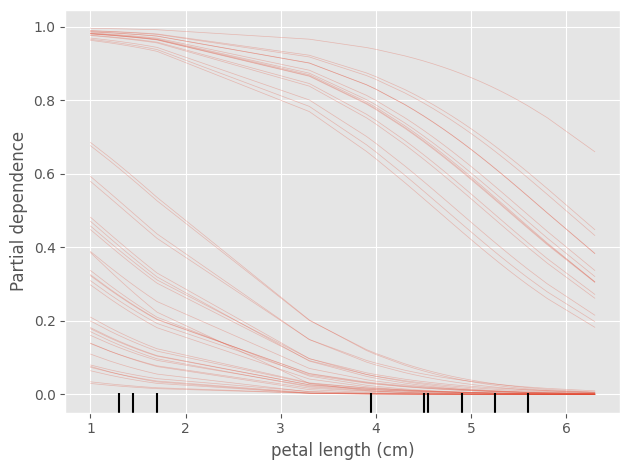

In [ ]:
feature_to_plot = "petal length (cm)"   # change if you want
target_class = 0                        # class index (0, 1, or 2)

PartialDependenceDisplay.from_estimator(
    # TODO
)
plt.tight_layout()
plt.show()

### Questions
- As the chosen feature increases, does the predicted probability for the chosen class increase or decrease?
- Does the curve look roughly linear (as expected for a linear model)?


### TODO – Same PDP/ICE for the Random Forest

- Plot the same PDP+ICE for the random forest pipeline.
- Compare the shape of the curves to those of the logistic regression.


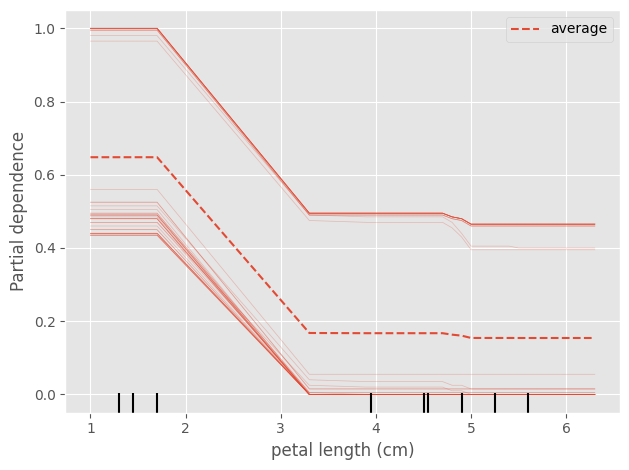

In [ ]:
# Repeat for Random Forest
# Define the partial dependence plot for Random Forest
# and plot it

### Questions:
- Is the relationship more non-linear for the random forest?  
- Are there regions where the two models strongly disagree on the effect of this feature?


##  Two-way partial dependence

Let's now look like at the dependicies of a model against a pair of features. We will choose a pair of features, e.g. petal length and petal width and plot a 2D partial dependence surface for one model (logistic regression or random forest).




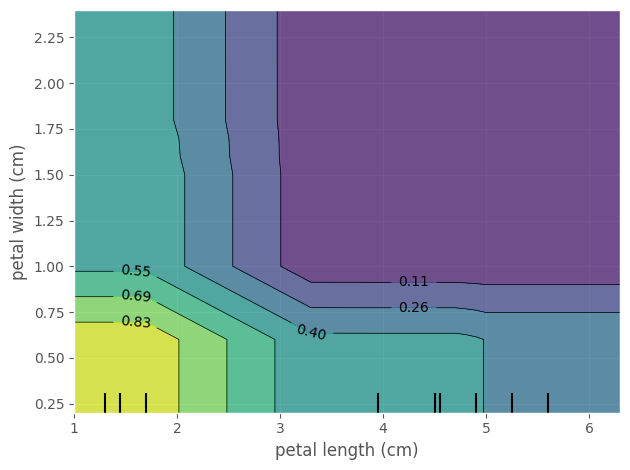

In [17]:
features_2d = [("petal length (cm)", "petal width (cm)")]

PartialDependenceDisplay.from_estimator(
    pipe_rf,
    X_test,
    features=features_2d,
    target=target_class,
)
plt.tight_layout()
plt.show()